In [68]:
import os, shutil
import numpy as np
import time
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [4]:
### Create folder structure

In [66]:
imagePath     = '../../data/imdb-wiki_crop_clean_align128/'
imageList=sorted(os.listdir(imagePath))
pipePath = '../../data/imdb-wiki_crop_clean_align128_kerasPipe/'
trainDir = pipePath + "train/"
testDir  = pipePath + "test/"

In [70]:
ntest = 6000

if not os.path.exists(pipePath):
    print("create "+pipePath)
    os.makedirs(pipePath)

# randomize/shuffle image idx
np.random.seed(123)
nima=len(imageList)
imageIdx = list(range(nima))
np.random.seed(123)
np.random.shuffle(imageIdx)

# collect labels
testLabel = []
trainLabel = []

ct = time.time()
cnt = 0 
for iidx in imageIdx:
    cnt+=1
    
    imaFile = imageList[iidx]
    clStr = imaFile[-5] # class label
    
    if cnt<ntest:
        tmpPath = testDir
        testLabel.append(int(clStr))
    else:
        tmpPath = trainDir
        trainLabel.append(int(clStr))
    
    destDir = tmpPath + clStr + '/' # add class label
    
    if not os.path.exists(destDir):
        print("create "+ destDir)
        os.makedirs(destDir)
    
    # move file
    shutil.copy2(imagePath+imaFile,destDir+imaFile)
    
    
print('time {} min'.format((time.time()-ct)/60.))

create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/test/2/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/test/4/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/test/3/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/test/5/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/test/0/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/test/1/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/train/3/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/train/2/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/train/5/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/train/4/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/train/1/
create ../../data/imdb-wiki_crop_clean_align128_kerasPipe/train/0/
time 2.80947519938 min


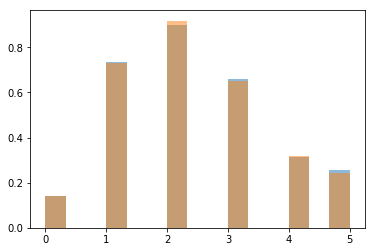

In [41]:
plt.hist(testLabel,bins=15,normed=True,alpha=0.5)
_=plt.hist(trainLabel,bins=15,normed=True,alpha=0.5)

### Test image pipeline

In [62]:
numEpoch = 3
batchSize =10

targetSize = (64,64)

#trainGen = ImageDataGenerator()

def createImageGenerator(imageDir,batchSize,targetSize):
    return ImageDataGenerator().flow_from_directory(
        imageDir,  # this is the target directory
        target_size = targetSize,
        batch_size=batchSize,
        seed = 1234,
        class_mode='sparse')

def preprocessImageBatch(imaArr):
    imaArr = imaArr.transpose((0,3,1,2))
    imaArr = (imaArr.astype(np.float32) - 127.5) / 127.5
    return imaArr
    
trainGenerator = createImageGenerator(trainDir,batchSize,targetSize) 
testGenerator  = createImageGenerator(testDir ,batchSize,targetSize) 

# trainGenerator = ImageDataGenerator().flow_from_directory(
#         trainDir,  # this is the target directory
#         target_size = -1,
#         batch_size=batchSize,
#         seed = 1234,
#         class_mode='sparse')  # since we use binary_crossentropy loss, we need binary labels


Found 134306 images belonging to 6 classes.
Found 4999 images belonging to 6 classes.


TypeError: 'int' object is not iterable

In [64]:
# here's a more "manual" example

nb_batch =3
for e in range(numEpoch):
    print 'Epoch', e
    batches = 0
    for X_batch, Y_batch in trainGenerator:
        print Y_batch
        batches += 1
        if batches >= nb_batch:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

for e in range(numEpoch):
    print 'Epoch', e
    batches = 0
    for k in range(2):
        X_batch, Y_batch =  testGenerator.next()
        print Y_batch
        batches += 1
        if batches >= nb_batch:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

Epoch 0
[4 2 4 0 0 3 3 2 0 3]
[2 4 2 2 5 1 1 5 4 1]
[1 3 1 2 3 2 3 4 1 1]
Epoch 1
[3 4 3 5 2 1 1 2 4 5]
[1 4 2 1 2 5 1 1 2 2]
[3 3 1 2 2 3 5 2 3 1]
Epoch 2
[1 1 3 1 1 1 3 3 3 2]
[1 0 2 0 2 2 5 2 3 0]
[2 2 3 2 0 4 0 3 5 3]
Epoch 0
[2 3 1 2 4 2 2 2 1 0]
[2 2 5 1 4 2 2 2 2 5]
Epoch 1
[1 2 2 2 2 0 3 3 2 3]
[2 1 1 1 5 5 3 5 4 2]
Epoch 2
[5 2 2 2 2 0 3 1 2 3]
[2 1 1 1 5 1 5 2 4 0]


In [55]:
trainGenerator.n

134306

In [65]:
print([X_batch.shape,Y_batch.shape])

[(10, 64, 64, 3), (10,)]


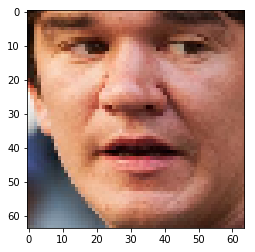

In [45]:
plt.imshow(X_batch[0]/255.)

In [42]:
trainGenerator.image_shape

(64, 64, 3)

In [46]:
x,y = trainGenerator.next()

In [51]:
y.s

(10,)

In [53]:
a= preprocessImageBatch(x)

In [54]:
a.shape

(10, 3, 64, 64)

In [59]:
len(trainGenerator.class_indices.keys())

6

In [71]:
trainGenerator.batch_size

10